**Exercise 13.31**. Suppose that $\{Y_t\}$ is a white noise process not necessarily normal. Use the orthogonality properties given in Appendix J to establish the following at the Fourier frequencies.

**(a)** The sample spectral density is an unbiased estimator of the theoretical spectral density.

**(b)** The variables $\hat{A}_{f_1}$ and  $\hat{B}_{f_2}$ are uncorrelated for any Fourier frequencies $f_1$, $f_2$.

**(c)** If the Fourier frequencies $f_1 \neq f_2$, the variables $\hat{A}_{f_1}$ and  $\hat{A}_{f_2}$ are uncorrelated.

**Solution**.

**(a)**  The sample spectral density is

$$ \hat{S}(f) = \frac{n}{4}\left(\hat{A}_f^2 + \hat{B}_f^2\right) $$

where

$$
\hat{A}_f = \frac{2}{n} \sum_{t=1}^n Y_t \cos (2 \pi t f)
\quad \text{and} \quad
\hat{B}_f = \frac{2}{n} \sum_{t=1}^n Y_t \sin (2 \pi t f)
$$

Therefore,

$$
\begin{align}
\text{E}[\hat{S}(f)]& = \frac{n}{4}  \text{E}\left[\left( \frac{2}{n} \sum_{t=1}^n Y_t \cos (2 \pi t f) \right)^2 + \left( \frac{2}{n} \sum_{t=1}^n Y_t \sin (2 \pi t f) \right)^2 \right] \\
&= \frac{1}{n} \text{E}\left[ \sum_{t=1}^n Y_t^2 + 2 \sum_{i < j} Y_i Y_j \cos (2 \pi (i - j) f) \right] \\
&= \frac{1}{n} \sum_{t=1}^n \text{E}[Y_t^2] +  2 \sum_{i < j} \text{E}[Y_i Y_j] \cos (2 \pi (i - j) f) \\
&= \gamma_0 +  2 \sum_{k=1}^\infty 0 \cdot \cos (2 \pi k f) \\
&= S(f)
\end{align}
$$

so the sample spectral density has an estimated value equal to the theoretical spectral density.

**(b)**  We have:

$$ 
\begin{align}
\text{Cov}\left[\hat{A}_{f_1}, \hat{B}_{f_2}\right] &= \text{Cov}\left[\frac{2}{n} \sum_{t=1}^n Y_t \cos (2 \pi t f_1),  \frac{2}{n} \sum_{t=1}^n Y_t \sin (2 \pi t f_2) \right] \\
&= \frac{4}{n^2} \sum_{t=1}^n \text{Var}[Y_t] \cos (2 \pi t f_1) \sin (2 \pi t f_2) \\
&= \frac{4 \gamma_0}{n^2} \sum_{t=1}^n \cos \left(2 \pi \frac{j}{n} t\right) \sin \left(2 \pi \frac{k}{n} t \right) \\
&= 0
\end{align}
$$

where we used the representation of the Fourier sequences $f_1 = j/n$, $f_2 = k/n$, and the orthogonality statement from Equation (13.J.3):

$$ \sum_{t=1}^n \cos \left(2 \pi \frac{j}{n} t\right) \sin \left(2 \pi \frac{k}{n} t \right) = 0 \tag{13.J.3} $$

**(c)**  We have:

$$ 
\begin{align}
\text{Cov}\left[\hat{A}_{f_1}, \hat{A}_{f_2}\right] &= \text{Cov}\left[\frac{2}{n} \sum_{t=1}^n Y_t \cos (2 \pi t f_1),  \frac{2}{n} \sum_{t=1}^n Y_t \cos (2 \pi t f_2) \right] \\
&= \frac{4}{n^2} \sum_{t=1}^n \text{Var}[Y_t] \cos (2 \pi t f_1) \cos (2 \pi t f_2) \\
&= \frac{4 \gamma_0}{n^2} \sum_{t=1}^n \cos \left(2 \pi \frac{j}{n} t\right) \cos \left(2 \pi \frac{k}{n} t \right) \\
&= 0
\end{align}
$$

where we used the representation of the Fourier sequences $f_1 = j/n$, $f_2 = k/n$, and the orthogonality statement from Equation (13.J.4):

$$ \sum_{t=1}^n \cos \left(2 \pi \frac{j}{n} t\right) \cos \left(2 \pi \frac{k}{n} t \right) = \begin{cases}
n/2 &\text{for } j = k \; (j \neq 0, j \neq n/2) \\
n &\text{for } j = k = 0 \\
0 &\text{for } j \neq k
\end{cases} \tag{13.J.4} $$

**Exercise 13.32**. Carry out a simulation analysis similar to those reported in Exhibits 13.21, 13.22, 13.23, and 13.24. Use an AR(2) model with $\phi_1 = 0.5$, $\phi_2 = −0.8$, and $n = 48$. Replicate the series 1000 times.

**(a)** Display the average sample spectral density by frequency and compare it with large sample theory.

**(b)** Display the standard deviation of the sample spectral density by frequency and compare it with large sample theory.

**(c)** Display the QQ plot of the appropriately scaled sample spectral density compared with large sample theory at several frequencies. Discuss your results.

**Solution**.

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.arima_process import ArmaProcess
from scipy.signal import periodogram

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_arima(phi=[], d=0, theta=[], n=100):
    """
    Generates an ARIMA distribution with specified phi, d, and theta parameters.
    """
    
    ar = np.r_[1, -np.array(phi)]
    ma = np.r_[1, -np.array(theta)]
    Y = ArmaProcess(ar, ma).generate_sample(nsample=n)
    for i in range(d):
        Y = np.cumsum(Y)
    return Y

def spectral_density_ar2(phi1, phi2):
    def s(f):
        return 1 / ((1 + phi1**2 + phi2**2 - \
                2 * phi1 * (1 - phi2) * np.cos(2 * np.pi * f) - 2 * phi2 * np.cos(4 * np.pi * f)))
    
    return s

In [3]:
B = 1000

Pxx = np.empty((B, 25))
np.random.seed(1000)

for i in tqdm_notebook(range(B)):
    Y = generate_arima(phi=[0.5, -0.8], n=48)
    f, Pxx[i, :] = periodogram(Y)
    
Pxx_mean = np.mean(Pxx, axis=0)
Pxx_std = np.std(Pxx, axis=0)

**(a)**

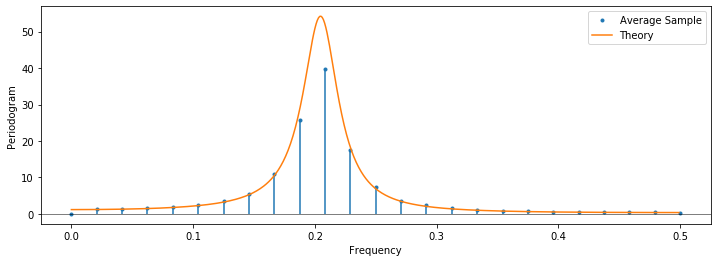

In [4]:
ft = np.arange(0, 0.5, step=1e-3)
d = spectral_density_ar2(0.5, -0.8)(ft) * 2

plt.figure(figsize=(12, 4))

plt.vlines(x=f, ymin=0, ymax=Pxx_mean, color='C0')
plt.plot(f, Pxx_mean, linestyle='none', marker='.', label='Average Sample')
plt.plot(ft, d, color='C1', label='Theory')
plt.axhline(y=0, xmin=0, xmax=1, color='black', lw=0.5)

plt.ylabel('Periodogram')
plt.xlabel('Frequency')
plt.legend(loc='upper right')
plt.show()

The overall shape is in agreement (after a scaling factor of 2 for scaling conventions).

**(b)**

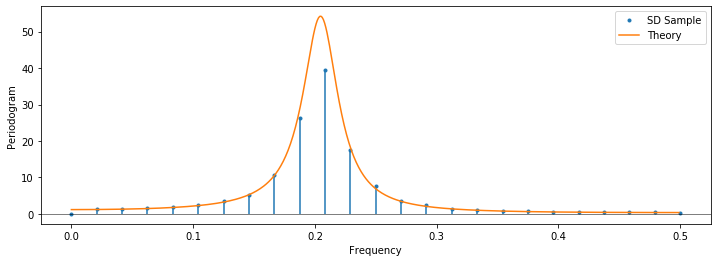

In [5]:
plt.figure(figsize=(12, 4))

plt.vlines(x=f, ymin=0, ymax=Pxx_std, color='C0')
plt.plot(f, Pxx_std, linestyle='none', marker='.', label='SD Sample')
plt.plot(ft, d, color='C1', label='Theory')
plt.axhline(y=0, xmin=0, xmax=1, color='black', lw=0.5)

plt.ylabel('Periodogram')
plt.xlabel('Frequency')
plt.legend(loc='upper right')
plt.show()

Again, a reasonable agreement in shape (after adjustment in scaling).

**(c)**  The expected distribution of the sample spectral density at any particular frequency should be a chi-squared distribution with two degrees of freedom.

In [6]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chi2

def plot_frequency(Pxx, index, freq_value):
    plt.figure(figsize=(8, 6))
    qqplot(Pxx[:, index], chi2, distargs=(2,), fit=True, line='45', ax=plt.gca())
    plt.title('QQ plot vs $\chi^2_2$ at frequency $f_{' + str(index) + '} = $' + str(round(freq_value, 4)))
    plt.show()

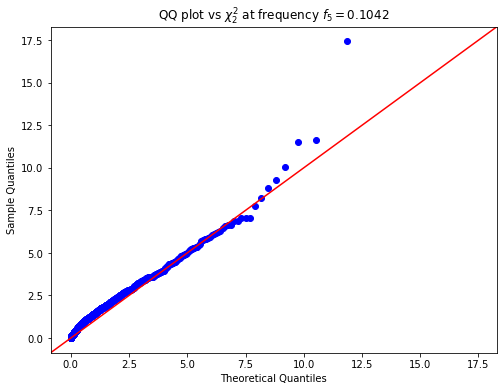

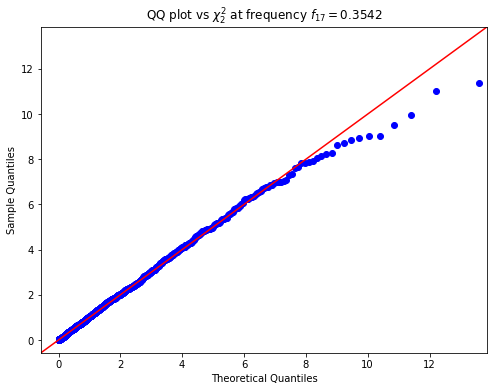

In [7]:
plot_frequency(Pxx, 5, f[5])
plot_frequency(Pxx, 17, f[17])

The quantile-quantile plots seem to be in agreement.

**Exercise 13.33**. Carry out a simulation analysis similar to those reported in Exhibits 13.21, 13.22, 13.23, and 13.24. Use an AR(2) model with $\phi_1 = -1$, $\phi_2 = −0.75$, and $n = 96$. Replicate the series 1000 times.

**(a)** Display the average sample spectral density by frequency and compare it with large sample theory.

**(b)** Display the standard deviation of the sample spectral density by frequency and compare it with large sample theory.

**(c)** Display the QQ plot of the appropriately scaled sample spectral density compared with large sample theory at several frequencies. Discuss your results.

In [8]:
B = 1000

Pxx = np.empty((B, 49))
np.random.seed(1000)

for i in tqdm_notebook(range(B)):
    Y = generate_arima(phi=[-1, -0.75], n=96)
    f, Pxx[i, :] = periodogram(Y)
    
Pxx_mean = np.mean(Pxx, axis=0)
Pxx_std = np.std(Pxx, axis=0)

**(a)**

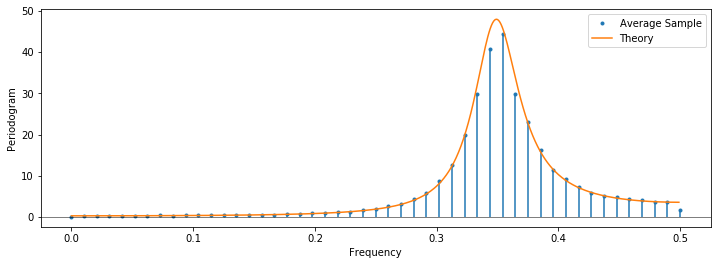

In [9]:
plt.figure(figsize=(12, 4))

ft = np.arange(0, 0.5, step=1e-3)
d = spectral_density_ar2(-1, -0.75)(ft) * 2

plt.vlines(x=f, ymin=0, ymax=Pxx_mean, color='C0')
plt.plot(f, Pxx_mean, linestyle='none', marker='.', label='Average Sample')
plt.plot(ft, d, color='C1', label='Theory')
plt.axhline(y=0, xmin=0, xmax=1, color='black', lw=0.5)

plt.ylabel('Periodogram')
plt.xlabel('Frequency')
plt.legend(loc='upper right')
plt.show()

After scaling adjustment, the overall shape is in agreement.

**(b)**

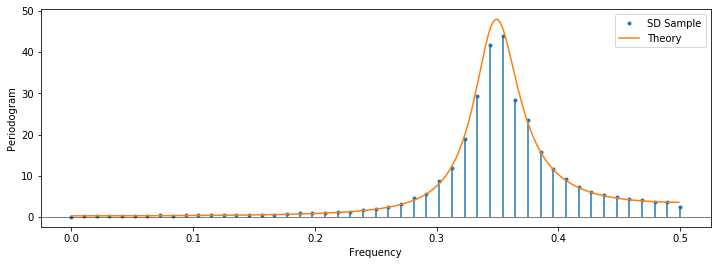

In [10]:
plt.figure(figsize=(12, 4))

plt.vlines(x=f, ymin=0, ymax=Pxx_std, color='C0')
plt.plot(f, Pxx_std, linestyle='none', marker='.', label='SD Sample')
plt.plot(ft, d, color='C1', label='Theory')
plt.axhline(y=0, xmin=0, xmax=1, color='black', lw=0.5)

plt.ylabel('Periodogram')
plt.xlabel('Frequency')
plt.legend(loc='upper right')
plt.show()

Again, a reasonable agreement in shape (after scaling adjustment).

**(c)**  The expected distribution of the sample spectral density at any particular frequency should be a chi-squared distribution with two degrees of freedom.

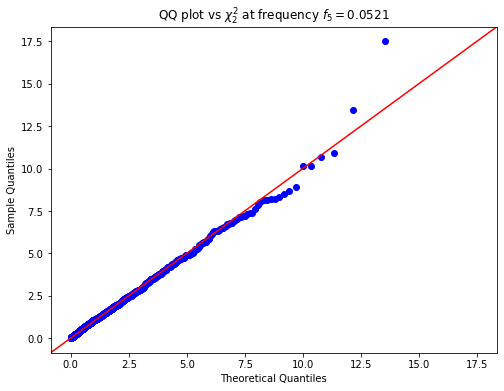

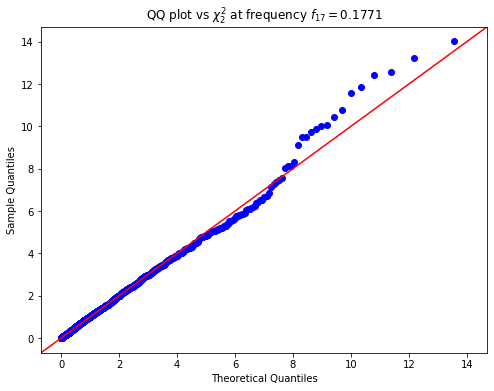

In [11]:
plot_frequency(Pxx, 5, f[5])
plot_frequency(Pxx, 17, f[17])

The quantile-quantile plots seem to be in agreement.

**Exercise 13.34**.  Simulate a zero-mean, unit-variance, normal white noise time series of length $n = 1000$. Display the periodogram of the series, and comment on the results.

**Solution**.

In [12]:
n = 1000

np.random.seed(0)
Y = np.random.normal(size=n)

f, Pxx = periodogram(Y)

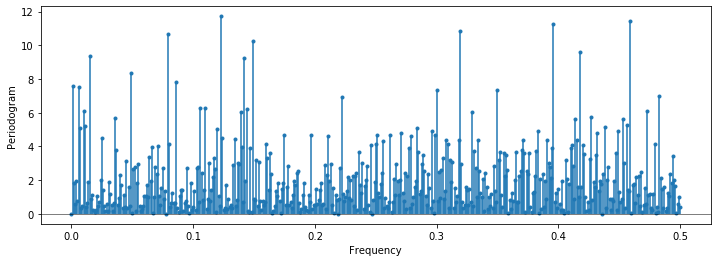

In [13]:
plt.figure(figsize=(12, 4))

plt.vlines(x=f, ymin=0, ymax=Pxx, color='C0')
plt.plot(f, Pxx, linestyle='none', marker='.', label='Sample Periodogram')
plt.axhline(y=0, xmin=0, xmax=1, color='black', lw=0.5)

plt.ylabel('Periodogram')
plt.xlabel('Frequency')
plt.show()

White noise's periodogram should provide a constant value at each frequency.  The figure fits this, despite plenty of noise, presenting no obvious patterns.